In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

In [2]:
# Loading the datasets
odi= pd.read_csv("ODI data.csv")
test= pd.read_csv("TEST data.csv")
t20= pd.read_csv("T20 data.csv")


# ODI DATA----- Analysing, Manipulation and Visualization

In [3]:
# Checking for null values
print(f"Null values in ODI data: {odi.isnull().sum().sum()}")
# Checking the shape of the datasets
print("ODI data shape:", odi.shape)
# Removing null values
odi.dropna(inplace=True)

Null values in ODI data: 7
ODI data shape: (388, 6)


In [4]:
odi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 387
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      381 non-null    object
 1   Team 2      381 non-null    object
 2   Winner      381 non-null    object
 3   Margin      381 non-null    object
 4   Ground      381 non-null    object
 5   Match Date  381 non-null    object
dtypes: object(6)
memory usage: 20.8+ KB


In [5]:
# Checking matches where Bangladesh was not involved or impossible matches
odi[(odi["Team 1"] != "Bangladesh") & (odi["Team 2"] != "Bangladesh")]

,Team 1,Team 2,Winner,Margin,Ground,Match Date


In [6]:
# Adding Year column by extracting year from Match Date
odi["Year"]= odi["Match Date"].str.split(",", expand=True)[1]
odi["Match Date"]=odi["Match Date"].str.split(",", expand=True)[0]
# Adding Month and Day columns by extracting from Match Date
odi[["Month","Day"]]=odi["Match Date"].str.split(" ", expand=True)
# Droping Match Date column
odi.drop(columns=["Match Date"], inplace=True)

#--------------------------------------------------------------------------------------------
# Swapping Team 1 and Team 2 columns where Team 2 is Bangladesh to make it consistent (np.where(condition, value_if_true, value_if_false))
con = odi["Team 2"] == "Bangladesh"
odi["Team"] = np.where(con, odi["Team 2"], odi["Team 1"])
odi["Opponent"] = np.where(con, odi["Team 1"], odi["Team 2"])
# Dropping Team 1 and Team 2 columns and renaming new columns
odi.drop(columns=["Team 1", "Team 2"], inplace=True)

#--------------------------------------------------------------------------------------------
# As Mirpur and dhaka Ground are same, replacing Mirpur with Dhaka
odi["Ground"].replace("Mirpur", "Dhaka", inplace=True)

#--------------------------------------------------------------------------------------------
# Adding 'Match Type' column to indicate Home or Away matches
x= (odi["Ground"]=="Mirpur") | (odi["Ground"]=="Chattogram") | (odi["Ground"]=="Dhaka")
odi["Match Type"]= np.where(x, "Home", "Away")

#--------------------------------------------------------------------------------------------
# For further calculation we are aming a column "Status Type" and calculating the type using numpy
con1= (odi["Winner"]=="Bangladesh") & (odi["Match Type"]=="Home")
con2= (odi["Winner"]=="Bangladesh") & (odi["Match Type"]=="Away")
con3= (odi["Winner"]!="Bangladesh") & (odi["Match Type"]=="Home")
con4= (odi["Winner"]!="Bangladesh") & (odi["Match Type"]=="Away")
odi["Status Type"]=np.where(con1, "Home Win",
                        np.where(con2, "Away Win",
                                np.where(con3, "Home Loss",
                                        np.where(con4, "Away Loss", "Draw"))))

#--------------------------------------------------------------------------------------------
# Creating a 'Status' column to indicate Win or Loss
odi["Status"]= np.where(odi["Winner"]=="Bangladesh", "Win","Loss")

#--------------------------------------------------------------------------------------------
# Splitting Margin column into Margin By and Margin Type for better analysis
odi["Margin By"]= odi["Margin"].str.split(" ", expand=True)[0]
odi["Margin Type"]= odi["Margin"].str.split(" ", expand=True)[1]
odi.drop(columns=["Margin"], inplace=True)

#--------------------------------------------------------------------------------------------
# As Bangladesh plays most of their home matches at these three grounds, making a list of these grounds for further analysis
std= ["Mirpur", "Chattogram", "Dhaka"]
home_ground=[]
for i in odi["Ground"]:
    if i in std:
        home_ground.append(i)

#--------------------------------------------------------------------------------------------
# Organising the columns for batter understanding and readibility
odi=odi[["Year","Month","Day","Team","Opponent","Winner","Ground","Status","Match Type","Status Type","Margin By","Margin Type"]]

#--------------------------------------------------------------------------------------------
# Changing Margin Type values to have consistent naming and avoid duplication
odi["Margin Type"]= odi["Margin Type"].replace({"wickets":"Wickets", "runs":"Runs", "wicket":"Wickets"})


In [7]:

# Checking the range of years in the dataset
print(f"Range of odi data: {odi['Year'].min()} - {odi['Year'].max()}")

Range of odi data:  1986 -  2021


In [8]:
odi.head()

,Year,Month,Day,Team,Opponent,Winner,Ground,Status,Match Type,Status Type,Margin By,Margin Type
0,1986,Mar,31,Bangladesh,Pakistan,Pakistan,Moratuwa,Loss,Away,Away Loss,7,Wickets
1,1986,Apr,2,Bangladesh,Sri Lanka,Sri Lanka,Kandy,Loss,Away,Away Loss,7,Wickets
2,1988,Oct,27,Bangladesh,India,India,Chattogram,Loss,Home,Home Loss,9,Wickets
3,1988,Oct,29,Bangladesh,Pakistan,Pakistan,Chattogram,Loss,Home,Home Loss,173,Runs
4,1988,Nov,2,Bangladesh,Sri Lanka,Sri Lanka,Dhaka,Loss,Home,Home Loss,9,Wickets


### Analysis Summery with text

In [9]:
print("="*40)
print(f"Bnagladesh played a total of {odi.shape[0]} ODI matches from {odi['Year'].min()} to {odi['Year'].max()}.")
print("="*80)
print(f"Out of which, Bangladesh won {odi[odi['Status']=='Win'].shape[0]} and lost {odi[odi['Status']=='Loss'].shape[0]} matches.")
print("="*80)
print(f"Out of those {odi[odi['Winner']=='Bangladesh'].shape[0]} matches, they won {odi[odi['Status Type']=='Home Win'].shape[0]} home matches and {odi[odi['Status Type']=='Away Win'].shape[0]} away matches.")
print("="*80)
print(f"Out of those {odi[odi['Winner']!='Bangladesh'].shape[0]} matches, they lost {odi[odi['Status Type']=='Home Loss'].shape[0]} home matches and {odi[odi['Status Type']=='Away Loss'].shape[0]} away matches.")
print("="*80)
print(f"Bangladesh played the most number of matches in the year {odi['Year'].value_counts().index[0]}, with a total of {odi['Year'].value_counts().max()} matches.")
print("="*80)
print(f"Bangladesh played the least number of matches in the year {odi['Year'].value_counts().index[-1]}, with a total of {odi['Year'].value_counts().min()} matches.")
print("="*80)
print(f"The month in which Bangladesh played the most number of matches is {odi['Month'].value_counts().index[0]}, with a total of {odi['Month'].value_counts().max()} matches.")
print("="*80)
print(f"The month in which Bangladesh played the least number of matches is {odi['Month'].value_counts().index[-1]}, with a total of {odi['Month'].value_counts().min()} matches.")
print("="*80)
print(f"Bangladesh won the most number of matches against {odi['Opponent'].where(odi['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {odi['Opponent'].where(odi['Winner']=='Bangladesh').value_counts().max()} wins.")
print("="*80)
print(f"Bangladesh lost the most number of matches against {odi['Opponent'].where(odi['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {odi['Opponent'].where(odi['Winner']!='Bangladesh').value_counts().max()} losses.")
print("="*80)
print(f"The ground where Bangladesh played the most number of matches is {odi['Ground'].value_counts().index[0]}, with a total of {odi['Ground'].value_counts().max()} matches.")
print("="*80)
print(f"The ground where Bangladesh won the most number of matches is {odi['Ground'].where(odi['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {odi['Ground'].where(odi['Winner']=='Bangladesh').value_counts().max()} wins.")
print("="*80)
print(f"The ground where Bangladesh lost the most number of matches is {odi['Ground'].where(odi['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {odi['Ground'].where(odi['Winner']!='Bangladesh').value_counts().max()} losses.")
print("="*50)

Bnagladesh played a total of 381 ODI matches from  1986 to  2021.
Out of which, Bangladesh won 136 and lost 245 matches.
Out of those 136 matches, they won 65 home matches and 71 away matches.
Out of those 245 matches, they lost 91 home matches and 154 away matches.
Bangladesh played the most number of matches in the year  2006, with a total of 28 matches.
Bangladesh played the least number of matches in the year  1986, with a total of 2 matches.
The month in which Bangladesh played the most number of matches is Mar, with a total of 50 matches.
The month in which Bangladesh played the least number of matches is Sep, with a total of 21 matches.
Bangladesh won the most number of matches against Zimbabwe, with a total of 50 wins.
Bangladesh lost the most number of matches against Sri Lanka, with a total of 40 losses.
The ground where Bangladesh played the most number of matches is Dhaka, with a total of 127 matches.
The ground where Bangladesh won the most number of matches is Dhaka, with

### Analysis Summery with percntages

In [10]:
print(f"Win percentage of Bangladesh in ODI matches is {round((odi[odi['Winner']=='Bangladesh'].shape[0]/odi.shape[0])*100,2)}% till 2021")
print(f"Home Win percentage of Bangladesh in ODI matches is {round(((odi[odi['Match Type']=='Home'].shape[0]) / ((odi['Match Type']=='Home') & (odi['Status Type']=='Home Win')).shape[0] * 100),2)}% till 2021")
print(f"Away Win percentage of Bangladesh in ODI matches is {round(((odi[odi['Match Type']=='Away'].shape[0]) / ((odi['Match Type']=='Away') & (odi['Status Type']=='Away Win')).shape[0] * 100),2)}% till 2021")
print("="*50)
# Win persentage with each team
teams= odi['Opponent'].unique()
win_percentages= {}
for team in teams:
    total_matches= odi[odi['Opponent']==team].shape[0]
    wins= odi[(odi['Opponent']==team) & (odi['Winner']=='Bangladesh')].shape[0]
    win_percentage= (wins/total_matches)*100
    win_percentages[team]= round(win_percentage,2)
    
print("Win percentages of Bangladesh against each team in ODI format: \n")
for team, percentage in win_percentages.items():
    print(f"{team}: {percentage}% in  {odi[odi['Opponent']==team].shape[0]} matches")
print("="*50)

Win percentage of Bangladesh in ODI matches is 35.7% till 2021
Home Win percentage of Bangladesh in ODI matches is 40.94% till 2021
Away Win percentage of Bangladesh in ODI matches is 59.06% till 2021
Win percentages of Bangladesh against each team in ODI format: 

Pakistan: 13.51% in  37 matches
Sri Lanka: 18.37% in  49 matches
India: 14.29% in  35 matches
New Zealand: 26.32% in  38 matches
Australia: 5.0% in  20 matches
Kenya: 57.14% in  14 matches
Zimbabwe: 64.1% in  78 matches
West Indies: 46.15% in  39 matches
Scotland: 100.0% in  4 matches
England: 19.05% in  21 matches
South Africa: 19.05% in  21 matches
Canada: 50.0% in  2 matches
Hong Kong: 100.0% in  1 matches
Bermuda: 100.0% in  2 matches
Ireland: 77.78% in  9 matches
U.A.E.: 100.0% in  1 matches
Netherlands: 50.0% in  2 matches
Afghanistan: 62.5% in  8 matches


### ODI Visualization

In [11]:
odi.head(2)

,Year,Month,Day,Team,Opponent,Winner,Ground,Status,Match Type,Status Type,Margin By,Margin Type
0,1986,Mar,31,Bangladesh,Pakistan,Pakistan,Moratuwa,Loss,Away,Away Loss,7,Wickets
1,1986,Apr,2,Bangladesh,Sri Lanka,Sri Lanka,Kandy,Loss,Away,Away Loss,7,Wickets


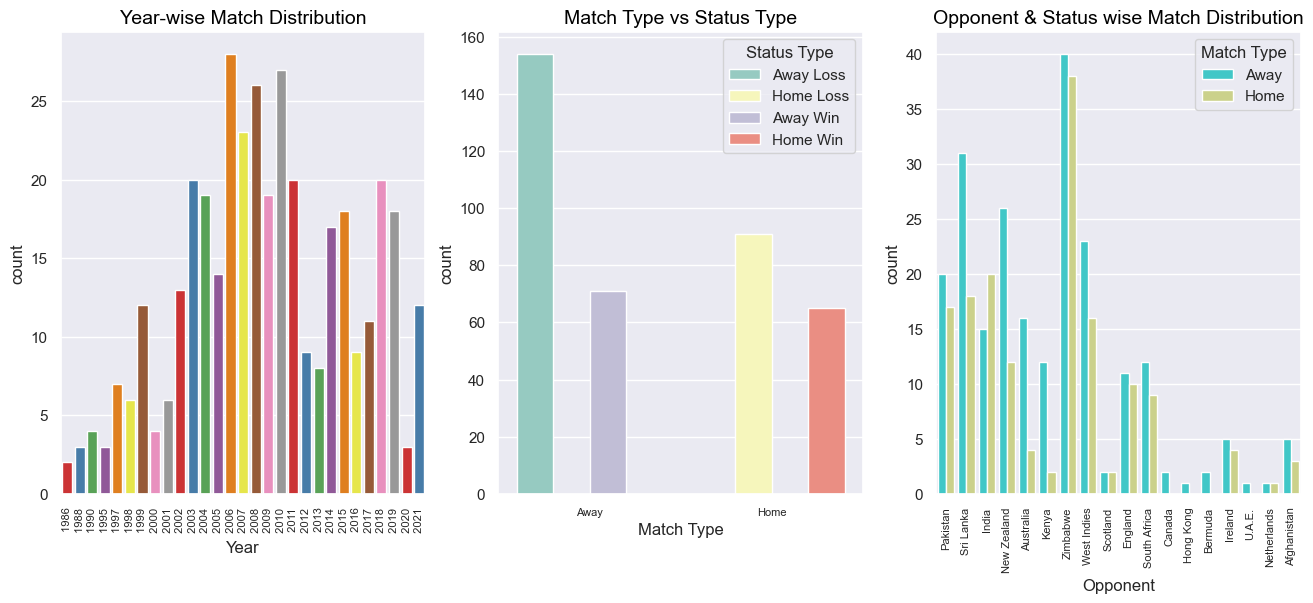

In [12]:
plt.figure(figsize=(16,6))
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
sns.countplot(data=odi, x='Year', palette='Set1')
plt.title("Year-wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
plt.subplot(1,3,2)
sns.countplot(data=odi, x='Match Type', palette='Set3', hue="Status Type")
plt.title("Match Type vs Status Type", fontsize=14, color='black')
plt.xticks(fontsize=8)
plt.subplot(1,3,3)
sns.countplot(data=odi, x='Opponent', palette="rainbow", hue="Match Type")
plt.title("Opponent & Status wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)

plt.show()


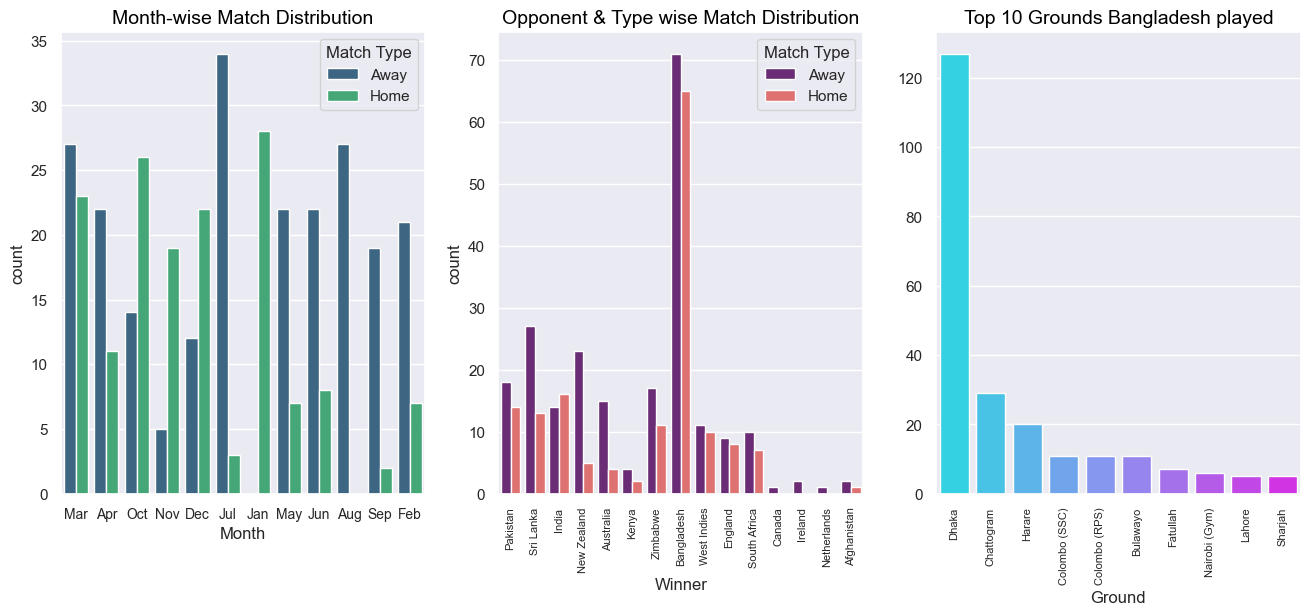

In [13]:

plt.figure(figsize=(16,6))
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
sns.countplot(data=odi, x='Month', palette='viridis', hue="Match Type")
plt.title("Month-wise Match Distribution", fontsize=14, color='black')
plt.xticks( fontsize=10)
plt.subplot(1,3,2)
sns.countplot(data=odi, x='Winner', palette='magma', hue="Match Type")
plt.title("Opponent & Type wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
plt.subplot(1,3,3)
sns.barplot( x=(odi["Ground"].value_counts().nlargest(10).index), palette='cool', y=(odi["Ground"].value_counts().nlargest(10).values))
plt.title("Top 10 Grounds Bangladesh played", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
plt.show()


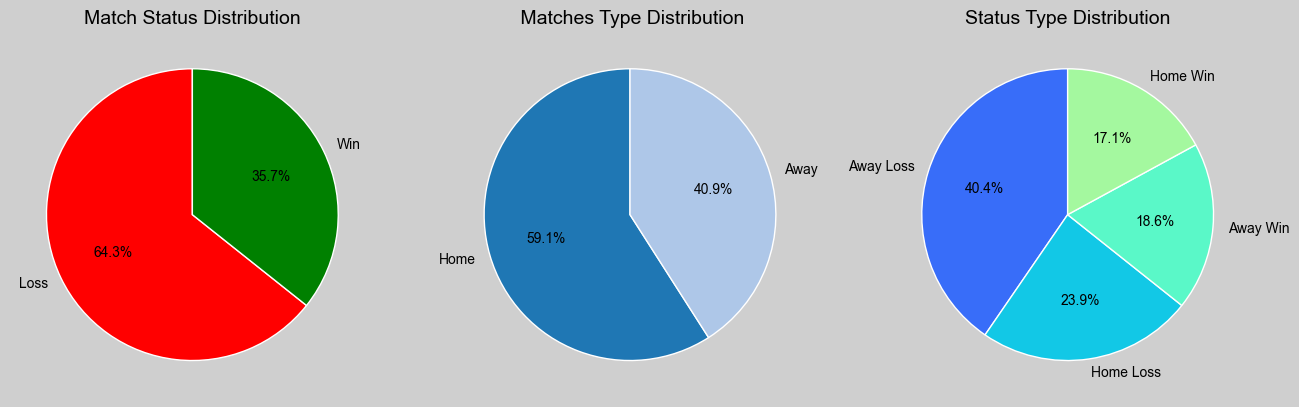

In [14]:
plt.figure(figsize=(16,6), facecolor="#CFCFCF")
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
colors = ['red', 'green']
plt.pie(odi["Status"].value_counts(),labels=odi["Status"].value_counts().index,autopct="%1.1f%%",colors=colors,startangle=90,textprops={'fontsize': 10, 'color': 'black', 'rotation': 0})
plt.title("Match Status Distribution", fontsize=14, color='black')

plt.subplot(1,3,2)
colors = sns.color_palette("tab20")
plt.pie(odi["Match Type"].value_counts(),labels=["Home", "Away"],autopct="%1.1f%%",startangle=90, colors=colors,textprops={'fontsize': 10, 'color': 'black'})
plt.title(" Matches Type Distribution", fontsize=14, color='black')

plt.subplot(1,3,3)
colors = sns.color_palette("rainbow")
plt.pie(odi["Status Type"].value_counts(),labels=odi["Status Type"].value_counts().index,autopct="%1.1f%%",colors=colors ,startangle=90,textprops={'fontsize': 10, 'color': 'black', 'rotation': 0})
plt.title("Status Type Distribution", fontsize=14, color='black')

plt.show()

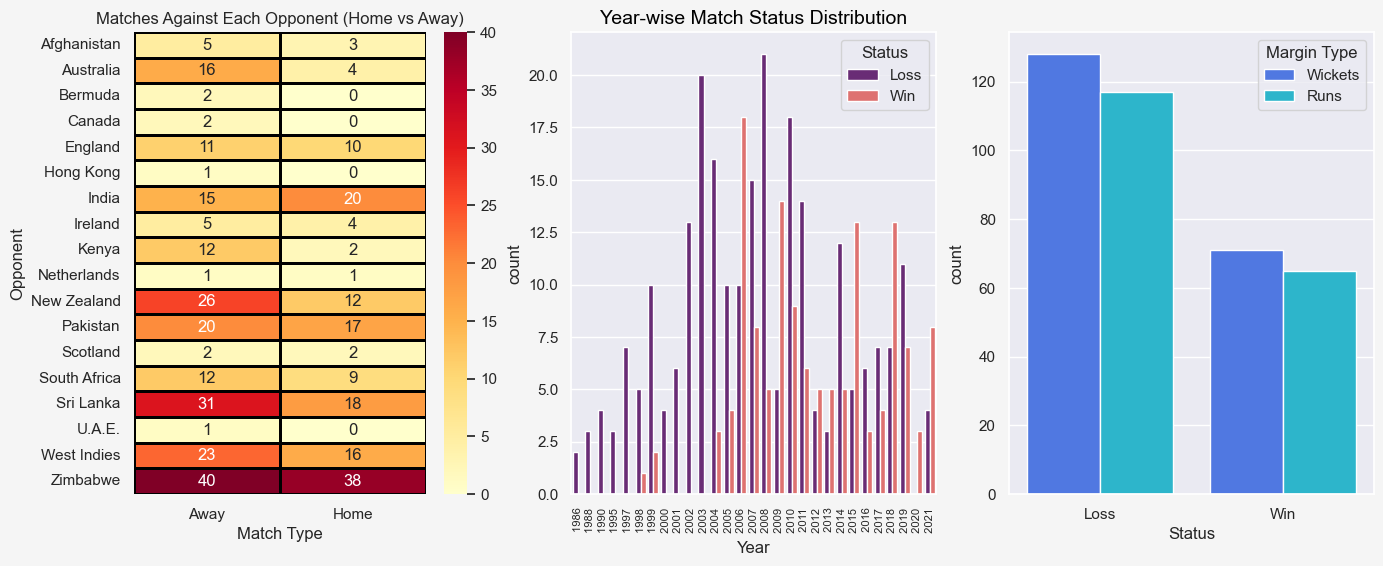

In [15]:
plt.figure(figsize=(16,6), facecolor="#F5F5F5")
sns.set_theme(style="darkgrid")

plt.subplot(1,3,1)
# Create a pivot table
pivot_table = pd.crosstab(odi['Opponent'], odi['Match Type'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=1, linecolor='black')
plt.title('Matches Against Each Opponent (Home vs Away)')
plt.xlabel('Match Type')
plt.ylabel('Opponent')

plt.subplot(1,3,2)
sns.countplot(data=odi, x='Year', palette='magma', hue="Status")
plt.title("Year-wise Match Status Distribution", fontsize=14, color='black')
plt.xlabel("Year")
plt.xticks(rotation=90, fontsize=8)


plt.subplot(1,3,3)
colors = sns.color_palette("rainbow")
sns.countplot(data=odi, x='Status', palette=colors, hue="Margin Type")

plt.show()

# T20 DATA----- Analysing, Manipulation and Visualization

In [16]:
# Checking for null values
print(f"Earlier there were {t20.isnull().sum().sum()} null values in T20 data.")
# Checking the shape of the datasets
print("T20 data shape was:", t20.shape)
# There is 2 null values in Margin column, filling them with 0
t20.fillna(0, inplace=True)
print(f"Now there is {t20.isnull().sum().sum()} null values in T20 data.")
# Dropping rows where Margin is 0
t20.drop(t20[t20["Margin"] == 0].index, inplace=True)
print("T20 data shape is now:", t20.shape)
# Checking matches where Bangladesh was not involved or impossible matches
t20[(t20["Team 1"] != "Bangladesh") & (t20["Team 2"] != "Bangladesh")]

Earlier there were 2 null values in T20 data.
T20 data shape was: (123, 6)
Now there is 0 null values in T20 data.
T20 data shape is now: (121, 6)


,Team 1,Team 2,Winner,Margin,Ground,Match Date


In [17]:
t20.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,Bangladesh,Zimbabwe,Bangladesh,43 runs,Khulna,"Nov 28, 2006"
1,Kenya,Bangladesh,Bangladesh,5 wickets,Nairobi (Gym),"Sep 1, 2007"
2,Bangladesh,Pakistan,Pakistan,30 runs,Nairobi (Gym),"Sep 2, 2007"
3,Bangladesh,West Indies,Bangladesh,6 wickets,Johannesburg,"Sep 13, 2007"
4,South Africa,Bangladesh,South Africa,7 wickets,Cape Town,"Sep 15, 2007"


In [18]:
t20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 122
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team 1      121 non-null    object
 1   Team 2      121 non-null    object
 2   Winner      121 non-null    object
 3   Margin      121 non-null    object
 4   Ground      121 non-null    object
 5   Match Date  121 non-null    object
dtypes: object(6)
memory usage: 6.6+ KB


In [19]:
# Converting Match Date to datetime format
t20["Match Date"] = pd.to_datetime(t20["Match Date"])
# Adding Year, Month and Day columns
t20["Year"] = t20["Match Date"].dt.year
t20["Month"] = t20["Match Date"].dt.month
t20["Day"] = t20["Match Date"].dt.day
# Formatting Month column to abbreviated month names
t20["Month"] = t20["Match Date"].dt.strftime("%b")
# Dropping Match Date column
t20.drop(columns=["Match Date"], inplace=True)

#--------------------------------------------------------------------------------------------

# Creating Team and Opponent columns based on whether Bangladesh is Team 1 or Team 2
con= t20["Team 2"]=="Bangladesh"
t20["Team"]=np.where(con, t20["Team 2"], t20["Team 1"])
t20["Opponent"]=np.where(con, t20["Team 1"], t20["Team 2"])
# Dropping Team 1 and Team 2 columns
t20.drop(columns=["Team 1", "Team 2"], inplace=True)

#--------------------------------------------------------------------------------------------

# Splitting Margin column into Margin Type and Margin By columns
t20["Margin Type"]= t20["Margin"].str.split(" ", expand=True)[1]
t20["Margin By"]= t20["Margin"].str.split(" ", expand=True)[0]
# Organizing columns to a better format
t20["Margin Type"].replace({"wickets":"Wicket", "runs":"Run","run":"Run","wicket":"Wicket"}, inplace=True)
# Dropping Margin column
t20.drop(columns=["Margin"], inplace=True)

#--------------------------------------------------------------------------------------------
# Creating Status column to indicate whether Bangladesh won or lost the match
t20["Status"]=np.where(t20["Winner"]=="Bangladesh", "Won", "Lost")

#--------------------------------------------------------------------------------------------

# Creating Match Type column to indicate whether the match was played at home or away
con1= t20["Ground"]=="Dhaka"
con2= t20["Ground"]=="Khulna"
con3= t20["Ground"]=="Chittagong"
con4= t20["Ground"]=="Sylhet"
t20["Match Type"]=np.where(con1 | con2 | con3 | con4, "Home", "Away")

#--------------------------------------------------------------------------------------------

# Creating Status Type column to indicate whether Bangladesh won or lost at home or away
con1= (t20["Status"]=="Won") & (t20["Match Type"]=="Home")
con2= (t20["Status"]=="Won") & (t20["Match Type"]=="Away")
con3= (t20["Status"]=="Lost") & (t20["Match Type"]=="Home")
con4= (t20["Status"]=="Lost") & (t20["Match Type"]=="Away")
t20["Status Type"]= np.where(con1, "Home Win", np.where(con2, "Away Win", np.where(con3, "Home Loss", "Away Loss")))

#--------------------------------------------------------------------------------------------

# Standardizing Ground names as per city names( There are 4 main grounds in Bangladesh where T20 matches are played)
t20["Ground"].replace({"Khulna":"Khulna", "Mirpur":"Dhaka", "Chattogram":"Chittagong", "Sylhet":"Sylhet"}, inplace=True)

#--------------------------------------------------------------------------------------------
# Organizing columns to a better format
t20= t20[["Year", "Month", "Day","Team", "Opponent", "Winner", "Ground", "Match Type", "Status", "Status Type", "Margin By", "Margin Type"]]

#--------------------------------------------------------------------------------------------
# Checking the range of years in the dataset
print(f"Range of t20 data: {t20['Year'].min()} - {t20['Year'].max()}")

Range of t20 data: 2006 - 2021


In [20]:
t20.head()

,Year,Month,Day,Team,Opponent,Winner,Ground,Match Type,Status,Status Type,Margin By,Margin Type
0,2006,Nov,28,Bangladesh,Zimbabwe,Bangladesh,Khulna,Home,Won,Home Win,43,Run
1,2007,Sep,1,Bangladesh,Kenya,Bangladesh,Nairobi (Gym),Away,Won,Away Win,5,Wicket
2,2007,Sep,2,Bangladesh,Pakistan,Pakistan,Nairobi (Gym),Away,Lost,Away Loss,30,Run
3,2007,Sep,13,Bangladesh,West Indies,Bangladesh,Johannesburg,Away,Won,Away Win,6,Wicket
4,2007,Sep,15,Bangladesh,South Africa,South Africa,Cape Town,Away,Lost,Away Loss,7,Wicket


### Analysis Summery with text

In [21]:
print("."*150)
print(f"Bnagladesh played a total of {t20.shape[0]} t20 matches from {t20['Year'].min()} to {t20['Year'].max()}.")
print("."*300)
print(f"Out of which, Bangladesh won {t20[t20['Status']=='Win'].shape[0]} and lost {t20[t20['Status']=='Loss'].shape[0]} matches.")
print("."*300)
print(f"Out of those {t20[t20['Winner']=='Bangladesh'].shape[0]} matches, they won {t20[t20['Status Type']=='Home Win'].shape[0]} home matches and {t20[t20['Status Type']=='Away Win'].shape[0]} away matches.")
print("."*300)
print(f"Out of those {t20[t20['Winner']!='Bangladesh'].shape[0]} matches, they lost {t20[t20['Status Type']=='Home Loss'].shape[0]} home matches and {t20[t20['Status Type']=='Away Loss'].shape[0]} away matches.")
print("."*300)
print(f"Bangladesh played the most number of matches in the year {t20['Year'].value_counts().index[0]}, with a total of {t20['Year'].value_counts().max()} matches.")
print("."*300)
print(f"Bangladesh played the least number of matches in the year {t20['Year'].value_counts().index[-1]}, with a total of {t20['Year'].value_counts().min()} matches.")
print("."*300)
print(f"The month in which Bangladesh played the most number of matches is {t20['Month'].value_counts().index[0]}, with a total of {t20['Month'].value_counts().max()} matches.")
print("."*300)
print(f"The month in which Bangladesh played the least number of matches is {t20['Month'].value_counts().index[-1]}, with a total of {t20['Month'].value_counts().min()} matches.")
print("."*300)
print(f"Bangladesh won the most number of matches against {t20['Opponent'].where(t20['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {t20['Opponent'].where(t20['Winner']=='Bangladesh').value_counts().max()} wins.")
print("."*300)
print(f"Bangladesh lost the most number of matches against {t20['Opponent'].where(t20['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {t20['Opponent'].where(t20['Winner']!='Bangladesh').value_counts().max()} losses.")
print("."*300)
print(f"The ground where Bangladesh played the most number of matches is {t20['Ground'].value_counts().index[0]}, with a total of {t20['Ground'].value_counts().max()} matches.")
print("."*300)
print(f"The ground where Bangladesh won the most number of matches is {t20['Ground'].where(t20['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {t20['Ground'].where(t20['Winner']=='Bangladesh').value_counts().max()} wins.")
print("."*300)
print(f"The ground where Bangladesh lost the most number of matches is {t20['Ground'].where(t20['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {t20['Ground'].where(t20['Winner']!='Bangladesh').value_counts().max()} losses.")
print("."*150)

......................................................................................................................................................
Bnagladesh played a total of 121 t20 matches from 2006 to 2021.
............................................................................................................................................................................................................................................................................................................
Out of which, Bangladesh won 0 and lost 0 matches.
............................................................................................................................................................................................................................................................................................................
Out of those 43 matches, they won 3 home matches and 40 away matches.
..............................................................

### Analysis Summery with Percentages

In [22]:
print(f"Win percentage of Bangladesh in t20 matches is {round((t20[t20['Winner']=='Bangladesh'].shape[0]/t20.shape[0])*100,2)}% till 2021")
print(f"Home Win percentage of Bangladesh in t20 matches is {round(((t20[t20['Match Type']=='Home'].shape[0]) / ((t20['Match Type']=='Home') & (t20['Status Type']=='Home Win')).shape[0] * 100),2)}% till 2021")
print(f"Away Win percentage of Bangladesh in t20 matches is {round(((t20[t20['Match Type']=='Away'].shape[0]) / ((t20['Match Type']=='Away') & (t20['Status Type']=='Away Win')).shape[0] * 100),2)}% till 2021")
print("."*300)
# Win persentage with each team
teams= t20['Opponent'].unique()
win_percentages= {}
for team in teams:
    total_matches= t20[t20['Opponent']==team].shape[0]
    wins= t20[(t20['Opponent']==team) & (t20['Winner']=='Bangladesh')].shape[0]
    win_percentage= (wins/total_matches)*100
    win_percentages[team]= round(win_percentage,2)
    
print("Win percentages of Bangladesh against each team in t20 format: \n")
for team, percentage in win_percentages.items():
    print(f"{team}: {percentage}% in  {t20[t20['Opponent']==team].shape[0]} matches")
print("."*300)

Win percentage of Bangladesh in t20 matches is 35.54% till 2021
Home Win percentage of Bangladesh in t20 matches is 5.79% till 2021
Away Win percentage of Bangladesh in t20 matches is 94.21% till 2021
............................................................................................................................................................................................................................................................................................................
Win percentages of Bangladesh against each team in t20 format: 

Zimbabwe: 68.75% in  16 matches
Kenya: 100.0% in  1 matches
Pakistan: 13.33% in  15 matches
West Indies: 41.67% in  12 matches
South Africa: 0.0% in  7 matches
Australia: 40.0% in  10 matches
Sri Lanka: 33.33% in  12 matches
India: 9.09% in  11 matches
Ireland: 75.0% in  4 matches
New Zealand: 20.0% in  15 matches
Scotland: 0.0% in  2 matches
Netherlands: 66.67% in  3 matches
Afghanistan: 33.33% in  6 matches
Nepal: 100.0% in  1 

### Visualization

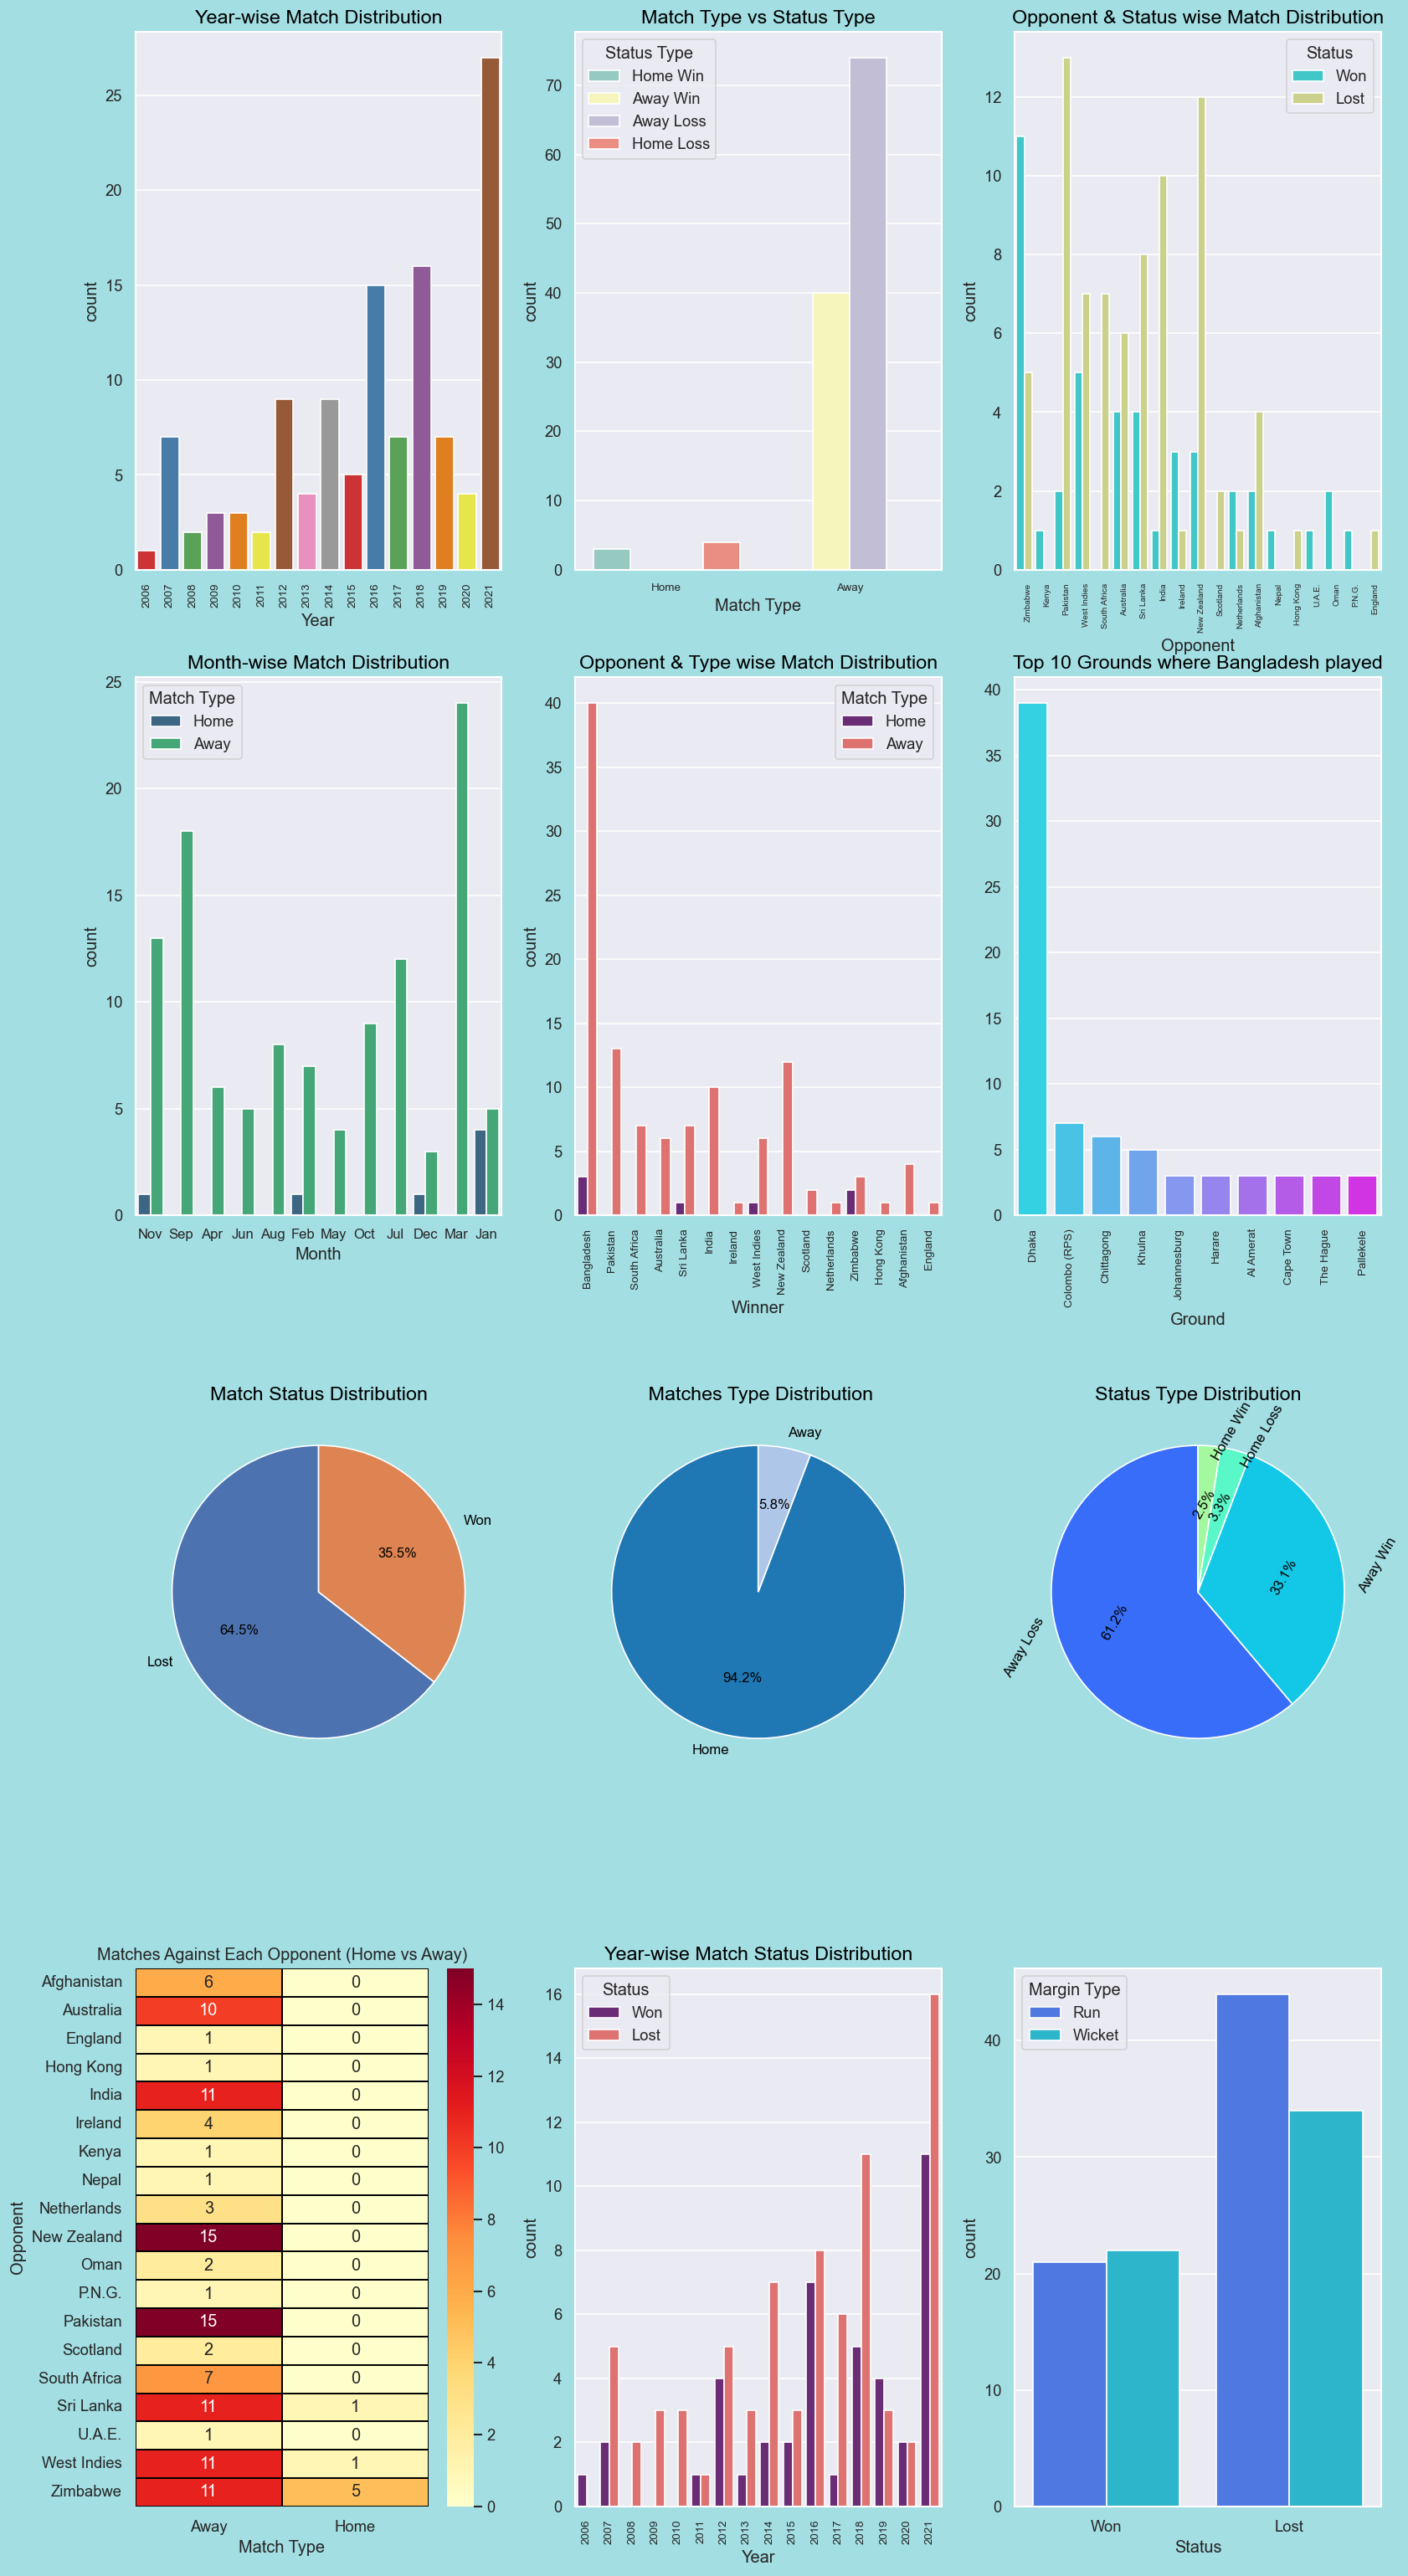

In [23]:
plt.figure(figsize=(16,32),dpi=120,facecolor="#a3dee3")
sns.set_theme(style="darkgrid")

plt.subplot(4,3,1)
sns.countplot(data=t20, x='Year', palette='Set1')
plt.title("Year-wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,2)
sns.countplot(data=t20, x='Match Type', palette='Set3', hue="Status Type")
plt.title("Match Type vs Status Type", fontsize=14, color='black')
plt.xticks(fontsize=8)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,3)
sns.countplot(data=t20, x='Opponent', palette="rainbow", hue="Status")
plt.title("Opponent & Status wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=6, rotation_mode='anchor', ha='right', va='top')
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,4)
sns.countplot(data=t20, x='Month', palette='viridis', hue="Match Type")
plt.title("Month-wise Match Distribution", fontsize=14, color='black')
plt.xticks( fontsize=10)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,5)
sns.countplot(data=t20, x='Winner', palette='magma', hue="Match Type")
plt.title("Opponent & Type wise Match Distribution", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,6)
sns.barplot( x=(t20["Ground"].value_counts().nlargest(10).index), palette='cool', y=(t20["Ground"].value_counts().nlargest(10).values))
plt.title("Top 10 Grounds where Bangladesh played", fontsize=14, color='black')
plt.xticks(rotation=90, fontsize=8)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,7)
plt.pie(t20["Status"].value_counts(),labels=t20["Status"].value_counts().index,autopct="%1.1f%%",startangle=90,textprops={'fontsize': 10, 'color': 'black', 'rotation': 0})
plt.title("Match Status Distribution", fontsize=14, color='black')
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,8)
colors = sns.color_palette("tab20")
plt.pie(t20["Match Type"].value_counts(),labels=["Home", "Away"],autopct="%1.1f%%",startangle=90, colors=colors,textprops={'fontsize': 10, 'color': 'black'})
plt.title(" Matches Type Distribution", fontsize=14, color='black')
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,9)
colors = sns.color_palette("rainbow")
plt.pie(t20["Status Type"].value_counts(),labels=t20["Status Type"].value_counts().index,autopct="%1.1f%%",colors=colors ,startangle=90,textprops={'fontsize': 10, 'color': 'black', 'rotation': 60})
plt.title("Status Type Distribution", fontsize=14, color='black')
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,10)
# Create a pivot table
pivot_table = pd.crosstab(t20['Opponent'], t20['Match Type'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=1, linecolor='black')
plt.title('Matches Against Each Opponent (Home vs Away)')
plt.xlabel('Match Type')
plt.ylabel('Opponent')
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,11)
sns.countplot(data=t20, x='Year', palette='magma', hue="Status")
plt.title("Year-wise Match Status Distribution", fontsize=14, color='black')
plt.xlabel("Year")
plt.xticks(rotation=90, fontsize=8)
#-----------------------------------------------------------------------------------------------------------------
plt.subplot(4,3,12)
colors = sns.color_palette("rainbow")
sns.countplot(data=t20, x='Status', palette=colors, hue="Margin Type")




plt.show()


# TEST DATA----- Analysing, Manipulation and Visualization

In [24]:
# Checking for null values
print(f"Earlier there were {test.isnull().sum().sum()} null values in test data.")
# Checking the shape of the datasets
print("test data shape was:", test.shape)
# There is 17 null values in Margin column, filling them with 0
test.fillna(0, inplace=True)
print(f"Now there is {test.isnull().sum().sum()} null values in test data.")
# As match number is less and null was 17, so we can not ignore these rows so we can not drop them
# Checking matches where Bangladesh was not involved or impossible matches
test[(test["Team 1"] != "Bangladesh") & (test["Team 2"] != "Bangladesh")]
# Checking matches where Bangladesh was not involved or impossible matches
test[(test["Team 1"] != "Bangladesh") & (test["Team 2"] != "Bangladesh")]

Earlier there were 17 null values in test data.
test data shape was: (126, 6)
Now there is 0 null values in test data.


,Team 1,Team 2,Winner,Margin,Ground,Match Date


In [25]:
# Adding Year column by extracting year from Match Date
test["Year"]= test["Match Date"].str.split(",", expand=True)[1]
test["Date"]= test["Match Date"].str.split(",", expand=True)[0]
# Dropping Match Date column
test.drop("Match Date", axis=1, inplace=True)

#--------------------------------------------------------------------------------------------

# Swapping Team 1 and Team 2 columns where Team 2 is Bangladesh to make it consistent (np.where(condition, value_if_true, value_if_false))
con = test["Team 2"] == "Bangladesh"
test["Team"] = np.where(con, test["Team 2"], test["Team 1"])
test["Opponent"] = np.where(con, test["Team 1"], test["Team 2"])
# Dropping Team 1 and Team 2 columns and renaming new columns
test.drop(columns=["Team 1", "Team 2"], inplace=True)

#--------------------------------------------------------------------------------------------
# Adding 'Match Type' column to indicate Home or Away matches
x= (test["Ground"]=="Mirpur") | (test["Ground"]=="Chattogram") | (test["Ground"]=="Dhaka")
test["Match Type"]= np.where(x, "Home", "Away")

#--------------------------------------------------------------------------------------------
# For further calculation we are aming a column "Status Type" and calculating the type using numpy
con1= (test["Winner"]=="Bangladesh") & (test["Match Type"]=="Home")
con2= (test["Winner"]=="Bangladesh") & (test["Match Type"]=="Away")
con3= (test["Winner"]!="Bangladesh") & (test["Match Type"]=="Home")
con4= (test["Winner"]!="Bangladesh") & (test["Match Type"]=="Away")
test["Status Type"]=np.where(con1, "Home Win",
                        np.where(con2, "Away Win",
                                np.where(con3, "Home Loss",
                                        np.where(con4, "Away Loss", "Draw"))))

#--------------------------------------------------------------------------------------------
# Creating a 'Status' column to indicate Win or Loss
test["Status"]= np.where(test["Winner"]=="Bangladesh", "Win","Loss")

#--------------------------------------------------------------------------------------------
# Fill NaN values with empty string first
test['Margin'] = test['Margin'].fillna('')
# Then create a new column 'Margin_Type'
test['Margin_Type'] = test['Margin'].apply(lambda x: 'Innings' if 'inns' in str(x).lower() else 'Wickets/Runs')

#--------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------
# Checking the range of years in the dataset
print(f"Range of test data: {test['Year'].min()} - {test['Year'].max()}")



Range of test data:  2000 -  2021


### Analysis Summery with text

In [26]:
print("="*50)
print(f"Bnagladesh played a total of {test.shape[0]} test matches from {test['Year'].min()} to {test['Year'].max()}.")
print("="*80)
print(f"Out of which, Bangladesh won {test[test['Status']=='Win'].shape[0]} and lost {test[test['Status']=='Loss'].shape[0]} matches.")
print("="*80)
print(f"Out of those {test[test['Winner']=='Bangladesh'].shape[0]} matches, they won {test[test['Status Type']=='Home Win'].shape[0]} home matches and {test[test['Status Type']=='Away Win'].shape[0]} away matches.")
print("="*80)
print(f"Out of those {test[test['Winner']!='Bangladesh'].shape[0]} matches, they lost {test[test['Status Type']=='Home Loss'].shape[0]} home matches and {test[test['Status Type']=='Away Loss'].shape[0]} away matches.")
print("="*80)
print(f"Bangladesh played the most number of matches in the year {test['Year'].value_counts().index[0]}, with a total of {test['Year'].value_counts().max()} matches.")
print("="*80)
print(f"Bangladesh played the least number of matches in the year {test['Year'].value_counts().index[-1]}, with a total of {test['Year'].value_counts().min()} matches.")
print("="*80)
print(f"Bangladesh won the most number of matches against {test['Opponent'].where(test['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {test['Opponent'].where(test['Winner']=='Bangladesh').value_counts().max()} wins.")
print("="*80)
print(f"Bangladesh lost the most number of matches against {test['Opponent'].where(test['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {test['Opponent'].where(test['Winner']!='Bangladesh').value_counts().max()} losses.")
print("="*80)
print(f"The ground where Bangladesh played the most number of matches is {test['Ground'].value_counts().index[0]}, with a total of {test['Ground'].value_counts().max()} matches.")
print("="*80)
print(f"The ground where Bangladesh won the most number of matches is {test['Ground'].where(test['Winner']=='Bangladesh').value_counts().index[0]}, with a total of {test['Ground'].where(test['Winner']=='Bangladesh').value_counts().max()} wins.")
print("="*80)
print(f"The ground where Bangladesh lost the most number of matches is {test['Ground'].where(test['Winner']!='Bangladesh').value_counts().index[0]}, with a total of {test['Ground'].where(test['Winner']!='Bangladesh').value_counts().max()} losses.")
print("="*50)
# Additional unique visualizations for your Bangladesh Test cricket data
# Since you only have 5 matches, let's create some summary visualizations

print("\n" + "="*60)
print("BANGLADESH TEST CRICKET ANALYSIS SUMMARY")
print("="*60)

# Summary statistics
print(f"\nTotal Matches: {len(test)}")
print(f"Home Matches: {len(test[test['Match Type'] == 'Home'])}")
print(f"Away Matches: {len(test[test['Match Type'] == 'Away'])}")
print(f"Win-Loss Ratio: N/A (All matches lost)")

# Opponent analysis
print("\nOpponent Analysis:")
for opponent in test['Opponent'].unique():
    matches_vs = len(test[test['Opponent'] == opponent])
    print(f"  vs {opponent}: {matches_vs} match(es)")

# Year analysis
print("\nYear-wise Analysis:")
for year in sorted(test['Year'].unique()):
    matches_year = len(test[test['Year'] == year])
    print(f"  {year}: {matches_year} match(es)")

Bnagladesh played a total of 126 test matches from  2000 to  2021.
Out of which, Bangladesh won 15 and lost 111 matches.
Out of those 15 matches, they won 9 home matches and 6 away matches.
Out of those 111 matches, they lost 51 home matches and 60 away matches.
Bangladesh played the most number of matches in the year  2003, with a total of 9 matches.
Bangladesh played the least number of matches in the year  2000, with a total of 1 matches.
Bangladesh won the most number of matches against Zimbabwe, with a total of 8 wins.
Bangladesh lost the most number of matches against Sri Lanka, with a total of 21 losses.
The ground where Bangladesh played the most number of matches is Chattogram, with a total of 29 matches.
The ground where Bangladesh won the most number of matches is Mirpur, with a total of 6 wins.
The ground where Bangladesh lost the most number of matches is Chattogram, with a total of 26 losses.

BANGLADESH TEST CRICKET ANALYSIS SUMMARY

Total Matches: 126
Home Matches: 60
A

### Visualization

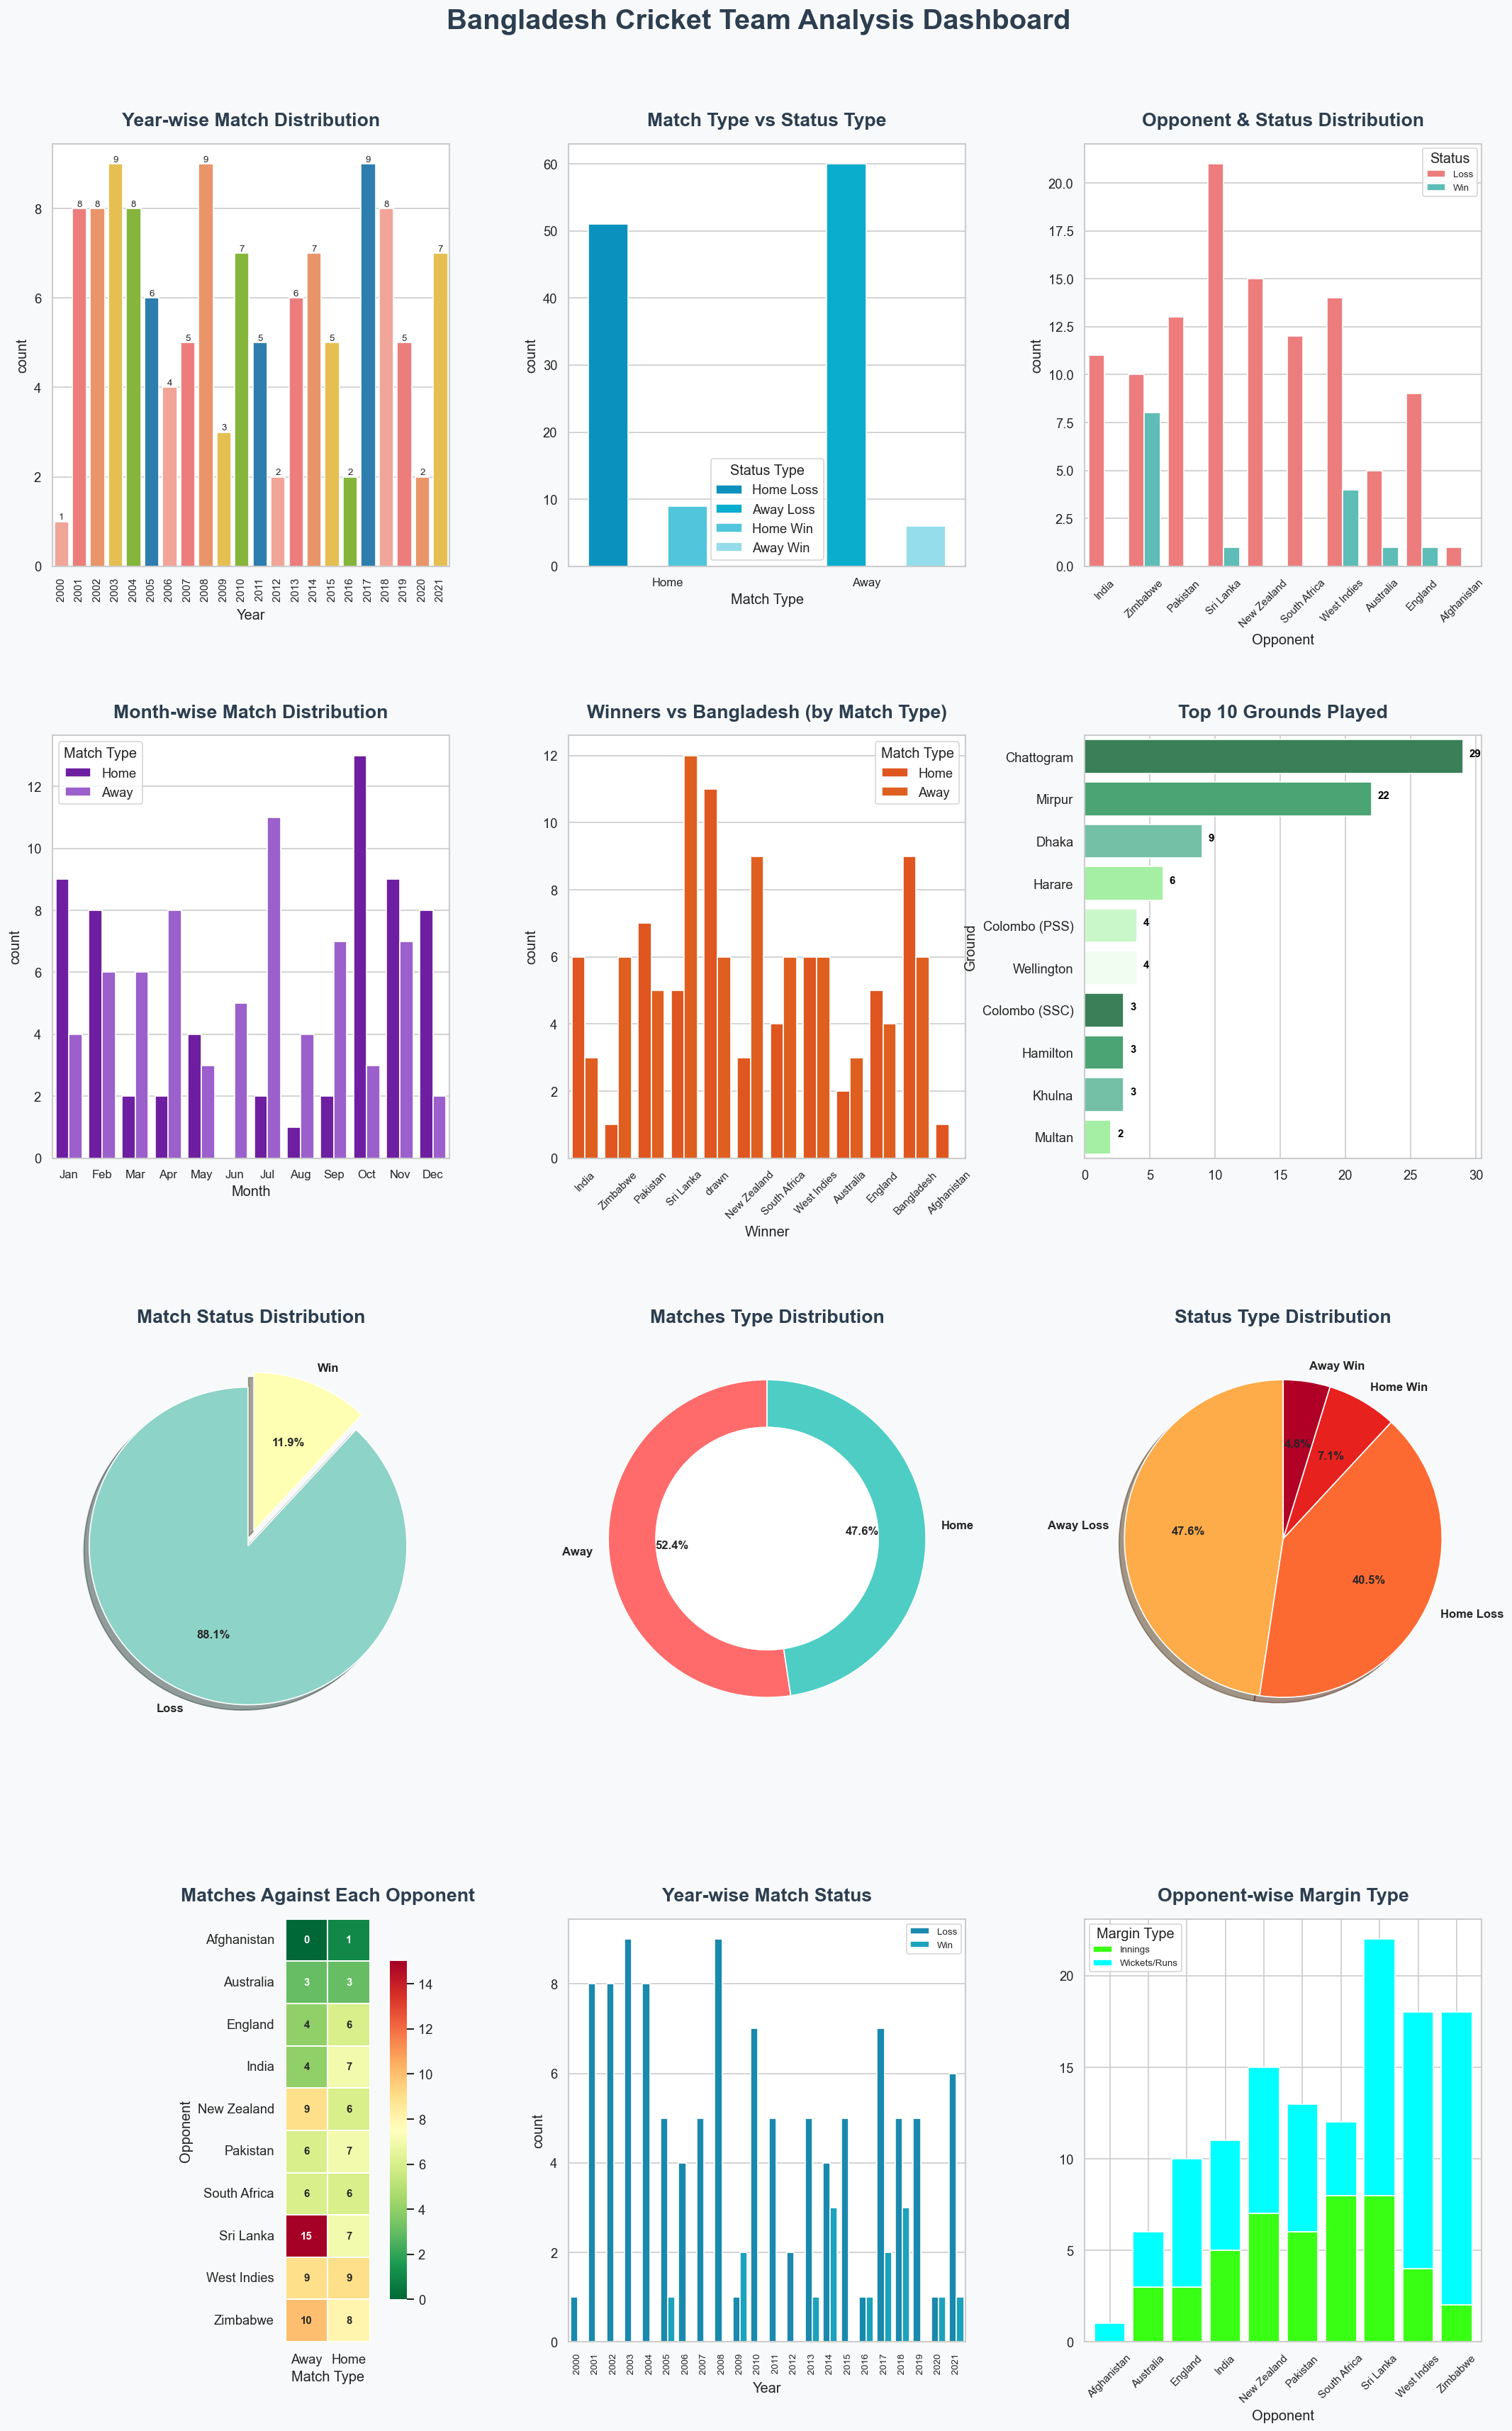

In [29]:
# Set the visual style
plt.figure(figsize=(18, 28), dpi=120, facecolor="#f8f9fa", edgecolor="k")
sns.set_theme(style="whitegrid", palette="deep")
plt.suptitle("Bangladesh Cricket Team Analysis Dashboard", fontsize=24, fontweight='bold', 
             color='#2c3e50', y=1.02)

# Color palette definitions
palettes = {
    'vibrant': ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', '#118AB2', '#EF476F'],
    'sunset': ['#FF9A8B', '#FF6B6B', '#FF8E53', '#FFCA3A', '#8AC926', '#1982C4'],
    'ocean': ['#0096C7', '#00B4D8', '#48CAE4', '#90E0EF', '#ADE8F4', '#CAF0F8'],
    'forest': ['#2E8B57', '#3CB371', '#66CDAA', '#98FB98', '#C1FFC1', '#F0FFF0'],
    'berry': ['#7209B7', '#9D4EDD', '#C77testF', '#E0AAFF', '#F3D9FA', '#F8F9FA'],
    'fire': ['#FF4800', '#FF5400', '#FF6000', '#FF6D00', '#FF8500', '#FF9100'],
    'neon': ['#39FF14', '#00FFFF', '#FF00FF', '#FFFF00', '#FF3131', '#FF5F1F']
}

# Plot 1: Year-wise Match Distribution
plt.subplot(4, 3, 1)
ax1 = sns.countplot(data=test, x='Year', palette=palettes['sunset'])
plt.title("Year-wise Match Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(rotation=90, fontsize=9)
for container in ax1.containers:
    ax1.bar_label(container, fontsize=8)

# Plot 2: Match Type vs Status Type
plt.subplot(4, 3, 2)
ax2 = sns.countplot(data=test, x='Match Type', palette=palettes['ocean'], hue="Status Type", 
                   saturation=0.9)
plt.title("Match Type vs Status Type", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(fontsize=10)

# Plot 3: Opponent & Status wise Match Distribution
plt.subplot(4, 3, 3)
ax3 = sns.countplot(data=test, x='Opponent', palette=palettes['vibrant'], hue="Status")
plt.title("Opponent & Status Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(rotation=45, fontsize=9)
plt.legend(title='Status', fontsize=8)

# Plot 4: Month-wise Match Distribution
test['Month'] = test['Date'].str.extract(r'([A-Za-z]+)')[0]
plt.subplot(4, 3, 4)
ax4 = sns.countplot(data=test, x='Month', palette=palettes['berry'], hue="Match Type",
                   order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Month-wise Match Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(fontsize=10)

# Plot 5: Winners vs Bangladesh (by Match Type)
plt.subplot(4, 3, 5)
ax5 = sns.countplot(data=test, x='Winner', palette=palettes['fire'], hue="Match Type")
plt.title("Winners vs Bangladesh (by Match Type)", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xticks(rotation=45, fontsize=9)

# Plot 6: Top Grounds where Bangladesh played
plt.subplot(4, 3, 6)
ground_counts = test["Ground"].value_counts().head(10)
ax6 = sns.barplot(x=ground_counts.values, y=ground_counts.index, palette=palettes['forest'])
plt.title("Top 10 Grounds Played", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
for i, v in enumerate(ground_counts.values):
    ax6.text(v + 0.5, i, str(v), color='black', fontweight='bold', fontsize=9)

# Plot 7: Match Status Distribution (Exploded Pie Chart)
plt.subplot(4, 3, 7)
status_counts = test["Status"].value_counts()
explode = [0.05] * len(status_counts)
plt.pie(status_counts.values, labels=status_counts.index, autopct="%1.1f%%", 
        startangle=90, explode=explode, shadow=True,
        colors=sns.color_palette("Set3"), textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title("Match Status Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)

# Plot 8: Matches Type Distribution (Doughnut Chart)
plt.subplot(4, 3, 8)
match_type_counts = test["Match Type"].value_counts()
colors = palettes['vibrant'][:len(match_type_counts)]
wedges, texts, autotexts = plt.pie(match_type_counts.values, labels=match_type_counts.index,
                                   autopct="%1.1f%%", startangle=90, colors=colors,
                                   wedgeprops=dict(width=0.3, edgecolor='w'),
                                   textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title("Matches Type Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Plot 9: Status Type Distribution (Gradient Pie)
plt.subplot(4, 3, 9)
status_type_counts = test["Status Type"].value_counts()
colors = plt.cm.YlOrRd(np.linspace(0.4, 0.9, len(status_type_counts)))
plt.pie(status_type_counts.values, labels=status_type_counts.index,
        autopct="%1.1f%%", colors=colors, shadow=True,
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title("Status Type Distribution", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)

# Plot 10: Heatmap - Matches Against Each Opponent
plt.subplot(4, 3, 10)
pivot_table = pd.crosstab(test['Opponent'], test['Match Type'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='RdYlGn_r', 
            linewidths=1, linecolor='white', square=True,
            annot_kws={"fontsize": 9, "fontweight": "bold"},
            cbar_kws={"shrink": 0.8})
plt.title('Matches Against Each Opponent', fontsize=16, fontweight='bold', 
          color='#2c3e50', pad=15)
plt.xlabel('Match Type', fontsize=12)
plt.ylabel('Opponent', fontsize=12)

# Plot 11: Year-wise Match Status Distribution
plt.subplot(4, 3, 11)
ax11 = sns.countplot(data=test, x='Year', palette=palettes['ocean'], hue="Status")
plt.title("Year-wise Match Status", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xlabel("Year", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.legend(fontsize=8)

# Plot 12: Margin Type Analysis (Stacked Bar)
plt.subplot(4, 3, 12)
# Create stacked bar chart
pivot_margin = pd.crosstab(test['Opponent'], test['Margin_Type'])
colors = palettes['neon'][:len(pivot_margin.columns)]
pivot_margin.plot(kind='bar', stacked=True, color=colors, ax=plt.gca(), width=0.8)
plt.title("Opponent-wise Margin Type", fontsize=16, fontweight='bold', 
          color='#2c3e50', pad=15)
plt.xticks(rotation=45, fontsize=9)
plt.legend(title='Margin Type', fontsize=8)
plt.tight_layout()

# Add overall styling
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()